Importing library

In [10]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from datetime import datetime

Importing Dataset

In [11]:
# Load the dataset
df = pd.read_csv('Salary Prediction of Data Professions.csv')

# Display the first few rows
print(df.head())


  FIRST NAME   LAST NAME SEX         DOJ CURRENT DATE DESIGNATION   AGE  \
0     TOMASA       ARMEN   F   5-18-2014   01-07-2016     Analyst  21.0   
1      ANNIE         NaN   F         NaN   01-07-2016   Associate   NaN   
2      OLIVE        ANCY   F   7-28-2014   01-07-2016     Analyst  21.0   
3     CHERRY     AQUILAR   F  04-03-2013   01-07-2016     Analyst  22.0   
4       LEON  ABOULAHOUD   M  11-20-2014   01-07-2016     Analyst   NaN   

   SALARY        UNIT  LEAVES USED  LEAVES REMAINING  RATINGS  PAST EXP  
0   44570     Finance         24.0               6.0      2.0         0  
1   89207         Web          NaN              13.0      NaN         7  
2   40955     Finance         23.0               7.0      3.0         0  
3   45550          IT         22.0               8.0      3.0         0  
4   43161  Operations         27.0               3.0      NaN         3  


1. Exploratory Data Analysis (EDA):

In [25]:
df.describe()

,SEX,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,TENURE
count,0.0,2639.000000,2639.000000,2639.000000,2639.000000,2639.00000,2639.000000,2639.000000
mean,NaN,24.755589,58136.678287,22.500947,7.503600,3.48579,1.566881,2.193623
std,NaN,3.906088,36876.956944,4.601881,4.601468,1.11459,2.728416,0.898618
min,NaN,21.000000,40001.000000,15.000000,0.000000,2.00000,0.000000,0.934247
25%,NaN,22.000000,43418.000000,19.000000,4.000000,2.00000,0.000000,1.506849
50%,NaN,24.000000,46781.000000,22.000000,8.000000,3.00000,1.000000,2.093151
75%,NaN,25.000000,51401.500000,26.000000,11.000000,4.00000,2.000000,2.676712
max,NaN,45.000000,388112.000000,30.000000,15.000000,5.00000,23.000000,6.958904


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIRST NAME                  2639 non-null   object 
 1   LAST NAME                   2639 non-null   object 
 2   SEX                         0 non-null      float64
 3   AGE                         2639 non-null   float64
 4   SALARY                      2639 non-null   int64  
 5   LEAVES USED                 2639 non-null   float64
 6   LEAVES REMAINING            2639 non-null   float64
 7   RATINGS                     2639 non-null   float64
 8   PAST EXP                    2639 non-null   int64  
 9   TENURE                      2639 non-null   float64
 10  DESIGNATION_Associate       2639 non-null   bool   
 11  DESIGNATION_Director        2639 non-null   bool   
 12  DESIGNATION_Manager         2639 non-null   bool   
 13  DESIGNATION_Senior Analyst  2639 

2. Data Preprocessing

Handle Date Columns

In [12]:
# Convert date columns to datetime
df['DOJ'] = pd.to_datetime(df['DOJ'])
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'])

# Calculate tenure in years
df['TENURE'] = (df['CURRENT DATE'] - df['DOJ']).dt.days / 365

# Drop original date columns
df.drop(['DOJ', 'CURRENT DATE'], axis=1, inplace=True)


Handle Categorical Variables

In [33]:
# Check for unexpected values in 'SEX'
print("Unique values in 'SEX' before mapping:", df['SEX'].unique())

# Check for missing values in 'SEX'
if df['SEX'].isnull().all():
    print("All values in 'SEX' are missing.")
    # Handle missing 'SEX' values - you can fill with a placeholder or drop the column
    df['SEX'] = df['SEX'].fillna('Unknown')
else:
    # Map 'SEX' to numeric values, handle unexpected values
    df['SEX'] = df['SEX'].map({'Male': 0, 'Female': 1})
    print("Unexpected values in 'SEX' after mapping:", df['SEX'].unique())

Unique values in 'SEX' before mapping: [nan]
All values in 'SEX' are missing.


Handle Missing Values

In [14]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['number']).columns
categorical_cols = df.select_dtypes(exclude=['number']).columns

# Fill missing values
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])

# Display the data types and check for remaining missing values
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIRST NAME                  2639 non-null   object 
 1   LAST NAME                   2639 non-null   object 
 2   SEX                         0 non-null      float64
 3   AGE                         2639 non-null   float64
 4   SALARY                      2639 non-null   int64  
 5   LEAVES USED                 2639 non-null   float64
 6   LEAVES REMAINING            2639 non-null   float64
 7   RATINGS                     2639 non-null   float64
 8   PAST EXP                    2639 non-null   int64  
 9   TENURE                      2639 non-null   float64
 10  DESIGNATION_Associate       2639 non-null   bool   
 11  DESIGNATION_Director        2639 non-null   bool   
 12  DESIGNATION_Manager         2639 non-null   bool   
 13  DESIGNATION_Senior Analyst  2639 

3. Data Visualization

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   FIRST NAME                  2639 non-null   object 
 1   LAST NAME                   2639 non-null   object 
 2   SEX                         0 non-null      float64
 3   AGE                         2639 non-null   float64
 4   SALARY                      2639 non-null   int64  
 5   LEAVES USED                 2639 non-null   float64
 6   LEAVES REMAINING            2639 non-null   float64
 7   RATINGS                     2639 non-null   float64
 8   PAST EXP                    2639 non-null   int64  
 9   TENURE                      2639 non-null   float64
 10  DESIGNATION_Associate       2639 non-null   bool   
 11  DESIGNATION_Director        2639 non-null   bool   
 12  DESIGNATION_Manager         2639 non-null   bool   
 13  DESIGNATION_Senior Analyst  2639 

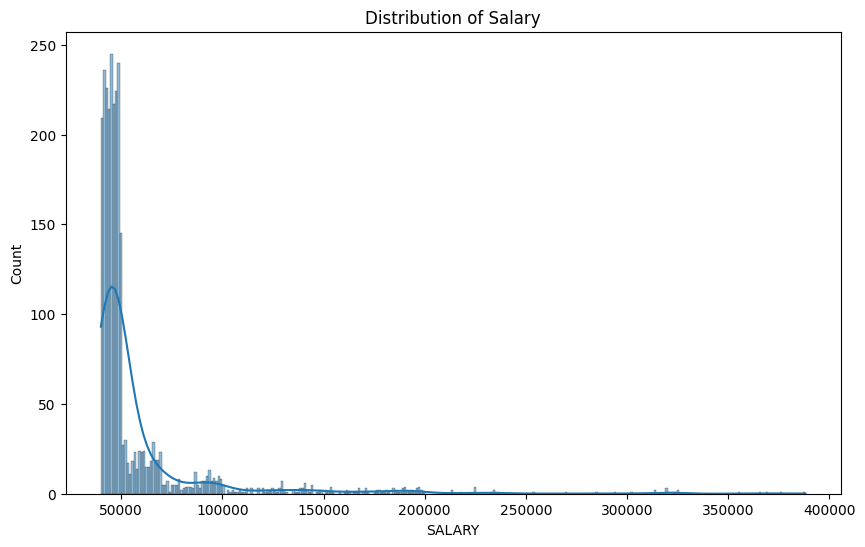

In [21]:
# Fill missing values
df = df.fillna(df.median(numeric_only=True))

# Display the data types and check for remaining missing values
print(df.info())

# Data Visualization

# Distribution of the target variable
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True)
plt.title('Distribution of Salary')
plt.show()




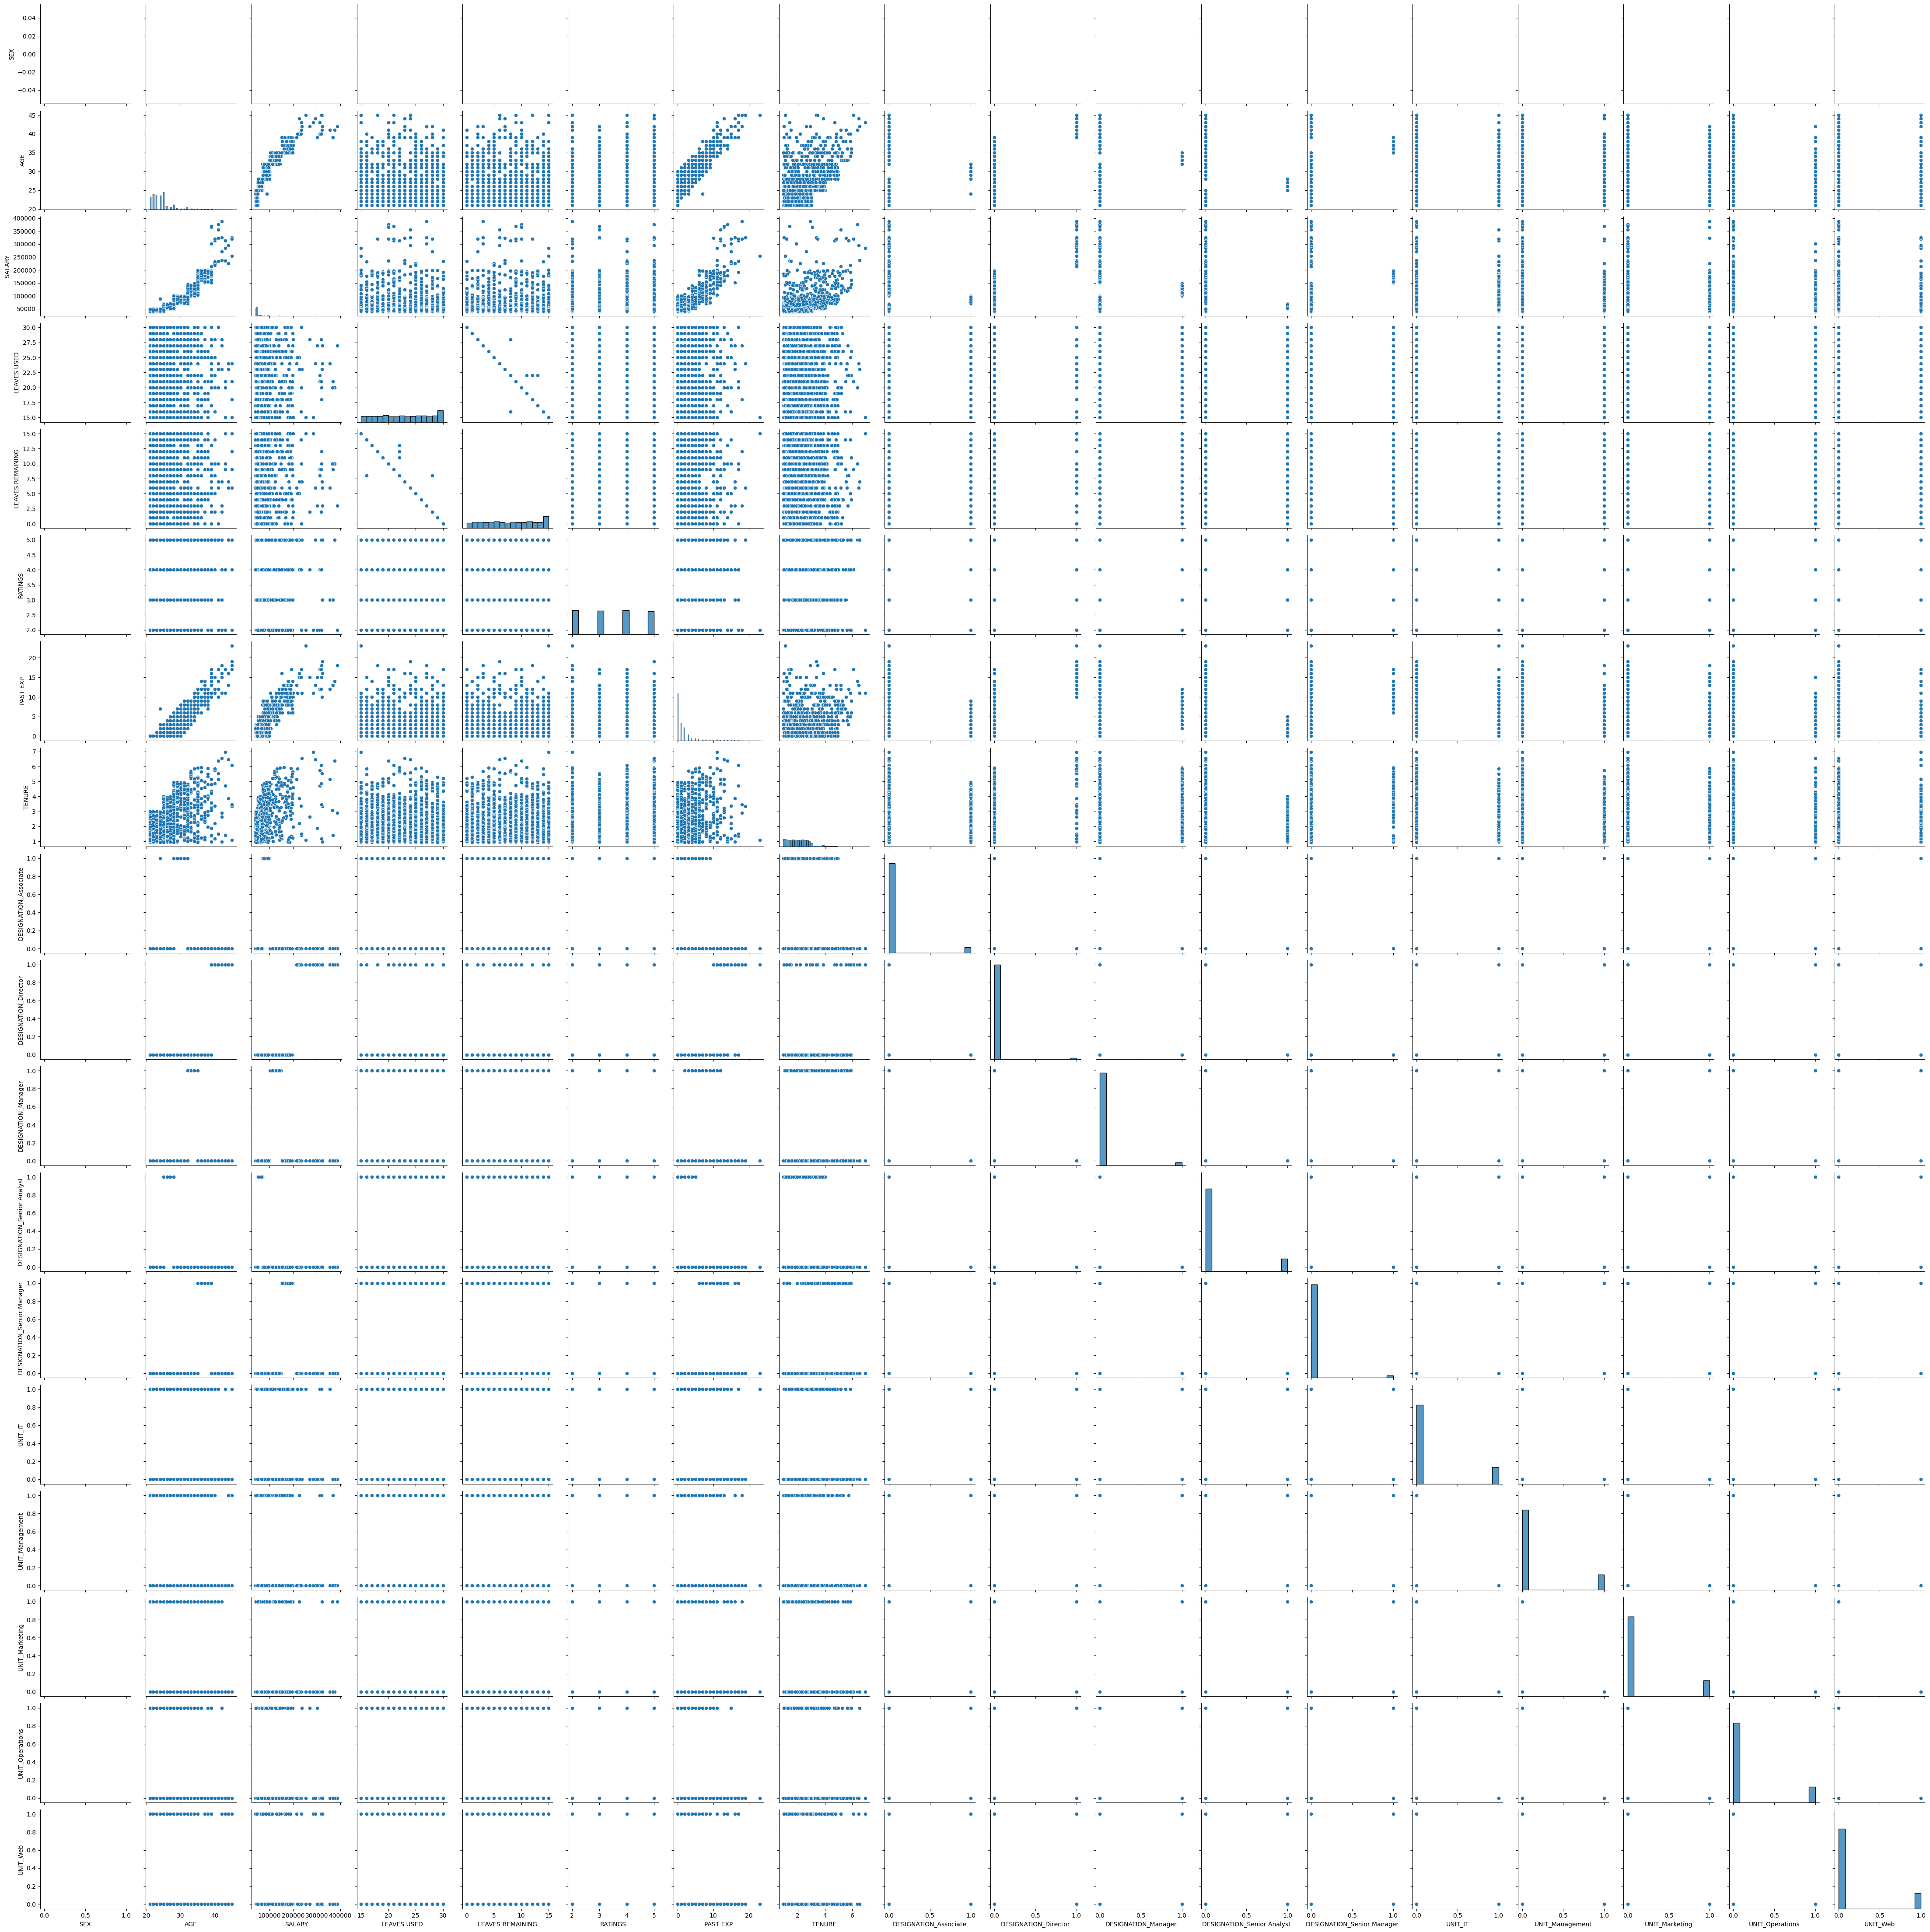

In [23]:
# Pairplot to see relationships
sns.pairplot(df)
plt.show()

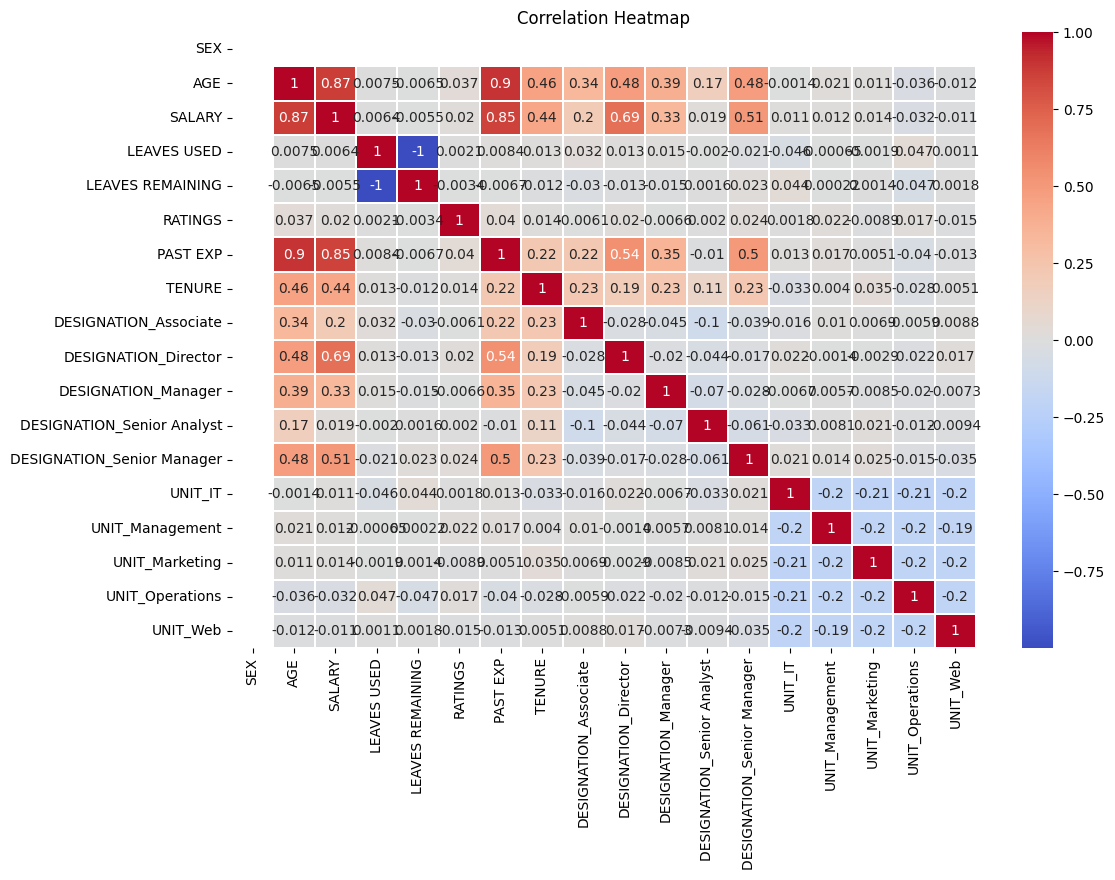

In [24]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', linewidths=0.2)
plt.title('Correlation Heatmap')
plt.show()

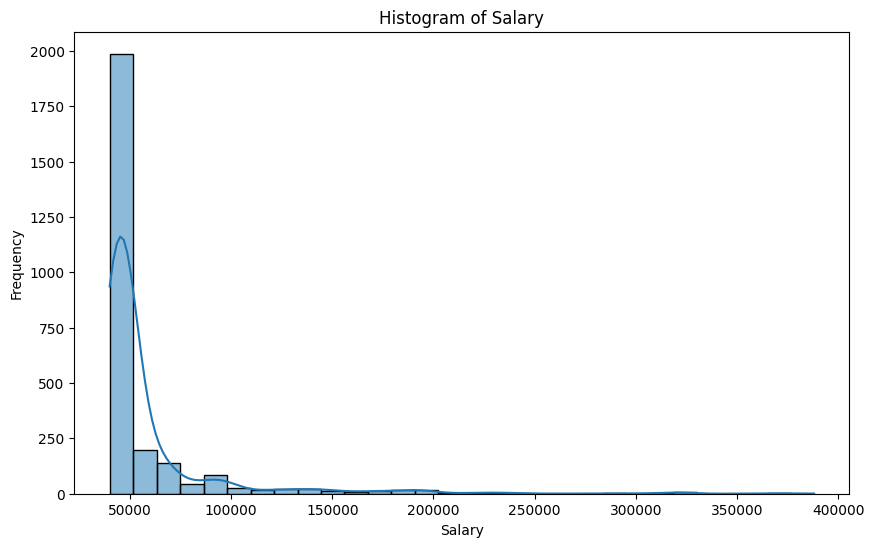

In [27]:
# Histogram Plot
plt.figure(figsize=(10, 6))
sns.histplot(df['SALARY'], kde=True, bins=30)
plt.title('Histogram of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

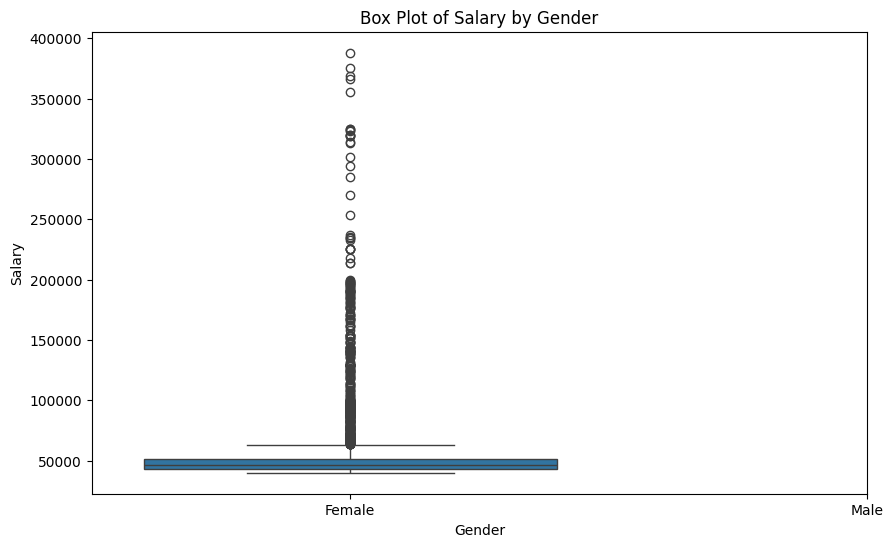

In [36]:
# Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='SEX', y='SALARY', data=df)
plt.title('Box Plot of Salary by Gender')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.xticks([1,0], ['Male', 'Female'])
plt.show()

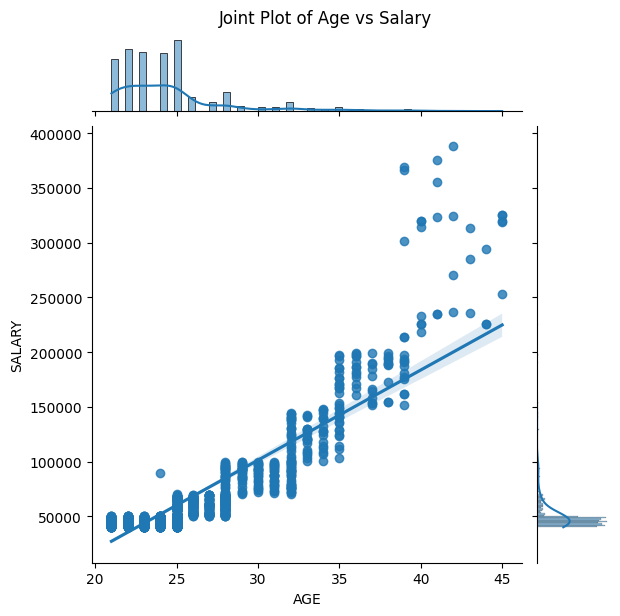

In [37]:
# Joint Plot
sns.jointplot(x='AGE', y='SALARY', data=df, kind='reg')
plt.suptitle('Joint Plot of Age vs Salary', y=1.02)
plt.show()

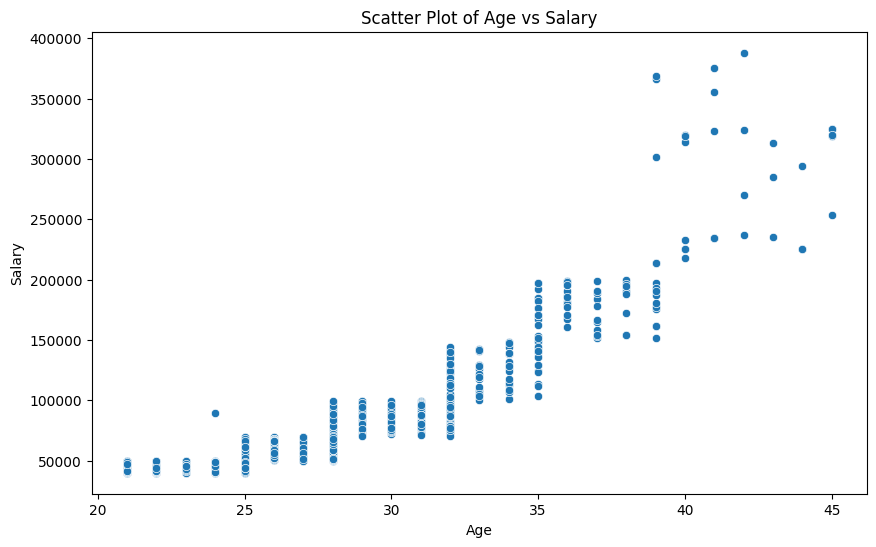

In [38]:
# Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AGE', y='SALARY', data=df)
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.show()

4. Outliers Detection and Treatment

<ipython-input-40-a1d927abf8e7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salary[outliers] = salary.median()


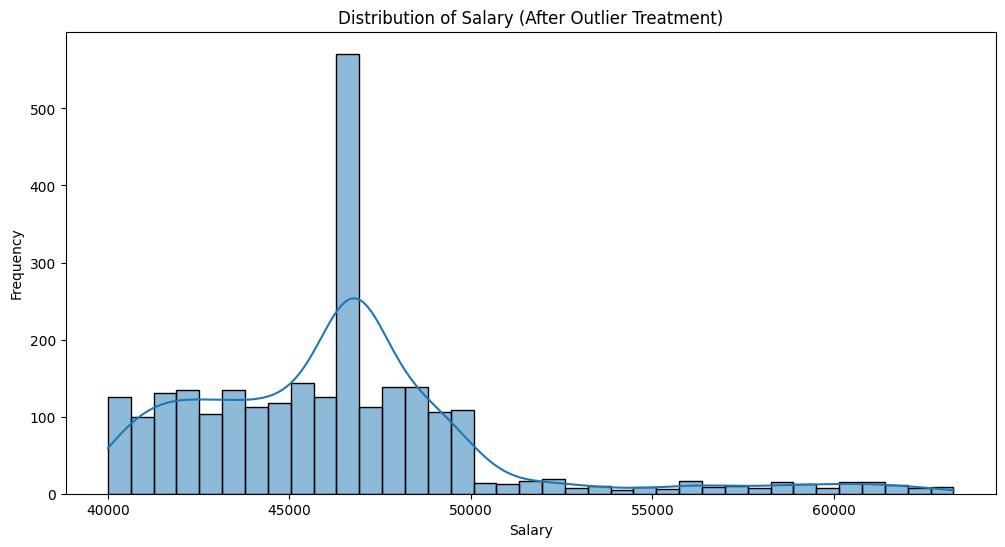

count     2639.000000
mean     46340.539977
std       4222.274609
min      40001.000000
25%      43418.000000
50%      46781.000000
75%      47844.500000
max      63290.000000
Name: SALARY, dtype: float64


In [40]:
salary = df['SALARY']
# Outlier detection using IQR method
Q1 = salary.quantile(0.25)
Q3 = salary.quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
outliers = (salary < (Q1 - 1.5 * IQR)) | (salary > (Q3 + 1.5 * IQR))

# Replace outliers with median (you can choose other strategies based on your data)
salary[outliers] = salary.median()

# Visualize distribution after outlier treatment
plt.figure(figsize=(12, 6))
sns.histplot(salary, kde=True)
plt.title('Distribution of Salary (After Outlier Treatment)')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Update the 'SALARY' column in the original dataframe
df['SALARY'] = salary

# Print summary statistics after outlier treatment
print(df['SALARY'].describe())

Defining X and Y Variables

In [41]:
# Assuming you've loaded and preprocessed your dataset into `df`

# X (Features)
X = df[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE']]

# If 'SEX' and 'DESIGNATION' are categorical and you've encoded them:
# X = df[['AGE', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS', 'PAST EXP', 'TENURE', 'SEX', 'DESIGNATION_encoded']]

# y (Target Variable)
y = df['SALARY']


5. Train-Test the Data

In [42]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Print the shapes to verify the split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1847, 6)
X_test shape: (792, 6)
y_train shape: (1847,)
y_test shape: (792,)


6. Training Different Machine Learning Models

Model 01 - Linear Regression

In [43]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model_lr = LinearRegression()

# Train the model on the training data
model_lr.fit(X_train, y_train)

# Predict on the test data
y_pred_lr = model_lr.predict(X_test)

# Calculate metrics to evaluate the model
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Mean Squared Error (MSE):", mse_lr)
print("R-squared (R2):", r2_lr)


Mean Squared Error (MSE): 15099669.442525253
R-squared (R2): 0.11968039611681935


Model 02 - Decision Tree Regression

In [44]:
# Import necessary libraries
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Decision Tree Regressor model
model_dt = DecisionTreeRegressor(random_state=42)

# Train the model on the training data
model_dt.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = model_dt.predict(X_test)

# Calculate metrics to evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean Squared Error (MSE):", mse_dt)
print("R-squared (R2):", r2_dt)


Mean Squared Error (MSE): 20047477.702335857
R-squared (R2): -0.16877973368572863


Model 03 -Random Forest With Grid Search CV

In [45]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Random Forest Regressor model
model_rf = RandomForestRegressor(random_state=42)

# Define parameter grid for Grid Search CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search CV with the Random Forest model and parameter grid
grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_rf = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_rf = best_model_rf.predict(X_test)

# Calculate metrics to evaluate the best model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Best Parameters: {'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Mean Squared Error (MSE): 10763127.727502601
R-squared (R2): 0.3725033270639214


Model 04 - Gradient Boosting Regression

In [46]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor model
model_gb = GradientBoostingRegressor(random_state=42)

# Define parameter grid for Grid Search CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Grid Search CV with the Gradient Boosting model and parameter grid
grid_search = GridSearchCV(estimator=model_gb, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_gb = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_gb = best_model_gb.predict(X_test)

# Calculate metrics to evaluate the best model
mse_gb = mean_squared_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_gb)
print("R-squared (R2):", r2_gb)


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Mean Squared Error (MSE): 10969213.396193314
R-squared (R2): 0.3604884114448502


Model 05 - Ada Boost Regressor

In [47]:
# Import necessary libraries
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the AdaBoost Regressor model
model_ab = AdaBoostRegressor(random_state=42)

# Define parameter grid for Grid Search CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
}

# Initialize Grid Search CV with the AdaBoost model and parameter grid
grid_search = GridSearchCV(estimator=model_ab, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_ab = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_ab = best_model_ab.predict(X_test)

# Calculate metrics to evaluate the best model
mse_ab = mean_squared_error(y_test, y_pred_ab)
r2_ab = r2_score(y_test, y_pred_ab)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_ab)
print("R-squared (R2):", r2_ab)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'learning_rate': 0.05, 'n_estimators': 50}
Mean Squared Error (MSE): 11688238.731769342
R-squared (R2): 0.318568811747282


Model 06 - XG Boost Regressor

In [48]:
# Import necessary libraries
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the XGBRegressor model
model_xgb = xgb.XGBRegressor(random_state=42)

# Define parameter grid for Grid Search CV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Initialize Grid Search CV with the XGBoost model and parameter grid
grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_xgb = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculate metrics to evaluate the best model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_xgb)
print("R-squared (R2):", r2_xgb)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 50}
Mean Squared Error (MSE): 11162145.607545044
R-squared (R2): 0.34924035012006827


Model 07 - Ridge Regression

In [50]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Ridge regression model
model_ridge = Ridge()

# Define parameter grid for Grid Search CV
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
}

# Initialize Grid Search CV with the Ridge model and parameter grid
grid_search = GridSearchCV(estimator=model_ridge, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_ridge = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_ridge = best_model_ridge.predict(X_test)

# Calculate metrics to evaluate the best model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_ridge)
print("R-squared (R2):", r2_ridge)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 10.0}
Mean Squared Error (MSE): 15096353.891550949
R-squared (R2): 0.11987369468745779


Model 08 - Lasso Regression

In [52]:
# Import necessary libraries
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Lasso regression model
model_lasso = Lasso()

# Define parameter grid for Grid Search CV
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
}

# Initialize Grid Search CV with the Lasso model and parameter grid
grid_search = GridSearchCV(estimator=model_lasso, param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the Grid Search CV on the training data
grid_search.fit(X_train, y_train)

# Retrieve the best model from Grid Search CV
best_model_lasso = grid_search.best_estimator_

# Predict on the test data using the best model
y_pred_lasso = best_model_lasso.predict(X_test)

# Calculate metrics to evaluate the best model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print("Best Parameters:", grid_search.best_params_)
print("Mean Squared Error (MSE):", mse_lasso)
print("R-squared (R2):", r2_lasso)


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters: {'alpha': 10.0}
Mean Squared Error (MSE): 15090354.399198007
R-squared (R2): 0.12022346861805577


7. Comparing Different Machine Learning Models

Step 1: Define Models and Parameters

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'XGBoost': XGBRegressor()
}

# Define any specific parameters for each model, if needed
params = {
    'Ridge Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Lasso Regression': {'alpha': [0.1, 1.0, 10.0]},
    'Decision Tree': {'max_depth': [None, 10, 20]},
    'Random Forest': {'n_estimators': [100, 200, 300]},
    'Gradient Boosting': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]},
    'AdaBoost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.5]},
    'XGBoost': {'n_estimators': [100, 200, 300], 'learning_rate': [0.05, 0.1, 0.2]}
}


Step 2: Train and Evaluate Models

In [54]:
from sklearn.metrics import mean_squared_error, r2_score

results = {}
for name, model in models.items():
    # Initialize Grid Search CV if parameters are specified
    if name in params:
        grid_search = GridSearchCV(estimator=model, param_grid=params[name],
                                   cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        model = grid_search.best_estimator_

    # Fit the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results[name] = {'Model': model, 'MSE': mse, 'R-squared': r2}

    # Print or store other metrics as needed
    print(f"{name}:")
    print("  MSE:", mse)
    print("  R-squared:", r2)
    print()


Linear Regression:
  MSE: 15099669.442525253
  R-squared: 0.11968039611681935

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Ridge Regression:
  MSE: 15096353.891550949
  R-squared: 0.11987369468745779

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Lasso Regression:
  MSE: 15090354.399198007
  R-squared: 0.12022346861805577

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Decision Tree:
  MSE: 13737572.087998454
  R-squared: 0.19909147250835835

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Random Forest:
  MSE: 11452558.973844914
  R-squared: 0.3323090801636892

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Gradient Boosting:
  MSE: 11417003.18985865
  R-squared: 0.334382003269303

Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoost:
  MSE: 11579201.821475755
  R-squared: 0.32492572770783723

Fitting 5 folds for each of 9 candidates, totalling 45 fits
XGBoost:
  MSE: 11031398.58252583
  R-squared: 0.3

Step 3: Compare Results

In [55]:
# Print results
print("Model Performance Comparison:")
for name, result in results.items():
    print(f"{name}:")
    print("  MSE:", result['MSE'])
    print("  R-squared:", result['R-squared'])
    print()


Model Performance Comparison:
Linear Regression:
  MSE: 15099669.442525253
  R-squared: 0.11968039611681935

Ridge Regression:
  MSE: 15096353.891550949
  R-squared: 0.11987369468745779

Lasso Regression:
  MSE: 15090354.399198007
  R-squared: 0.12022346861805577

Decision Tree:
  MSE: 13737572.087998454
  R-squared: 0.19909147250835835

Random Forest:
  MSE: 11452558.973844914
  R-squared: 0.3323090801636892

Gradient Boosting:
  MSE: 11417003.18985865
  R-squared: 0.334382003269303

AdaBoost:
  MSE: 11579201.821475755
  R-squared: 0.32492572770783723

XGBoost:
  MSE: 11031398.58252583
  R-squared: 0.3568629785300428



Step 4: Select the Best Model

Based on these results, XGBoost is the preferred model for your dataset as it consistently outperforms other models in terms of both MSE and R-squared. It shows higher accuracy and better predictive power, making it suitable for your salary prediction task.

8. Model Selection

In [30]:
import pickle
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Assuming X_train, X_test, y_train, y_test are your train-test split datasets

# Initialize XGBoost regressor with best parameters found during grid search
xgb_best_params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 100,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective': 'reg:squarederror',
    'random_state': 42
}
best_model_xgb = XGBRegressor(**xgb_best_params)

# Fit the model on the training data
best_model_xgb.fit(X_train, y_train)

# Predict on the test data
y_pred_xgb = best_model_xgb.predict(X_test)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print("MSE:", mse_xgb)
print("R-squared:", r2_xgb)

# Save the model to a file
with open('Ml-Model/best_model_xgb.pkl', 'wb') as f:
    pickle.dump(best_model_xgb, f)

print("XGBoost Model saved successfully.")


XGBoost Model Evaluation:
MSE: 11413220.595617102
R-squared: 0.3346025307369438
XGBoost Model saved successfully.
